In [1]:
# INSTALLATION AND IMPORTS
!pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [4]:
# FIRST, UPLOAD YOUR FILES TO COLAB
from google.colab import files
import pandas as pd
import io

print("📁 PLEASE UPLOAD YOUR DATASET FILES:")

# Method 1: Upload files manually
uploaded = files.upload()

# Check what files were uploaded
print("✅ Uploaded files:")
for filename in uploaded.keys():
    print(f"  - {filename}")

# Method 2: If you have the files in your Google Drive, mount drive instead:
"""
from google.colab import drive
drive.mount('/content/drive')

# Then update the file paths to point to your Drive location
# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')
"""

📁 PLEASE UPLOAD YOUR DATASET FILES:


Saving Features data set.csv to Features data set.csv
✅ Uploaded files:
  - Features data set.csv


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# Then update the file paths to point to your Drive location\n# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')\n"

In [6]:
# FIRST, UPLOAD YOUR FILES TO COLAB
from google.colab import files
import pandas as pd
import io

print("📁 PLEASE UPLOAD YOUR DATASET FILES:")

# Method 1: Upload files manually
uploaded = files.upload()

# Check what files were uploaded
print("✅ Uploaded files:")
for filename in uploaded.keys():
    print(f"  - {filename}")

# Method 2: If you have the files in your Google Drive, mount drive instead:
"""
from google.colab import drive
drive.mount('/content/drive')

# Then update the file paths to point to your Drive location
# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')
"""

📁 PLEASE UPLOAD YOUR DATASET FILES:


Saving sales data-set.csv to sales data-set.csv
✅ Uploaded files:
  - sales data-set.csv


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# Then update the file paths to point to your Drive location\n# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')\n"

In [8]:
# FIRST, UPLOAD YOUR FILES TO COLAB
from google.colab import files
import pandas as pd
import io

print("📁 PLEASE UPLOAD YOUR DATASET FILES:")

# Method 1: Upload files manually
uploaded = files.upload()

# Check what files were uploaded
print("✅ Uploaded files:")
for filename in uploaded.keys():
    print(f"  - {filename}")

# Method 2: If you have the files in your Google Drive, mount drive instead:
"""
from google.colab import drive
drive.mount('/content/drive')

# Then update the file paths to point to your Drive location
# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')
"""

📁 PLEASE UPLOAD YOUR DATASET FILES:


Saving stores data-set (1).csv to stores data-set (1).csv
✅ Uploaded files:
  - stores data-set (1).csv


"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# Then update the file paths to point to your Drive location\n# features_df = pd.read_csv('/content/drive/MyDrive/your-folder/Features data set.csv')\n"

In [10]:
# LOAD DATASETS WITH CORRECT FILE NAMES
# After uploading, use the actual file names from the upload

# Get the actual file names from what you uploaded
file_names = list(uploaded.keys())
print("Available files:", file_names)

# Load each dataset (adjust names based on your actual file names)
features_df = pd.read_csv('Features data set.csv')
sales_df = pd.read_csv('sales data-set.csv')
stores_df = pd.read_csv('stores data-set (1).csv')

print("📊 DATASET SHAPES:")
print(f"Features Data: {features_df.shape}")
print(f"Sales Data: {sales_df.shape}")
print(f"Stores Data: {stores_df.shape}")

Available files: ['stores data-set (1).csv']
📊 DATASET SHAPES:
Features Data: (8190, 12)
Sales Data: (421570, 5)
Stores Data: (45, 3)


In [13]:
# FIXED DATA CLEANING AND PREPROCESSING
print("🧹 DATA CLEANING AND PREPROCESSING")

# Check for missing values
print("Missing Values:")
print("Features Data:")
print(features_df.isnull().sum())
print("\nStores Data:")
print(stores_df.isnull().sum())
print("\nSales Data:")
print(sales_df.isnull().sum())

# FIX: Convert date columns to datetime with correct format
print("\n📅 CONVERTING DATE COLUMNS...")
try:
    # Try different date formats
    features_df['Date'] = pd.to_datetime(features_df['Date'], format='%d/%m/%Y')
    sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%d/%m/%Y')
    print("✅ Date conversion successful with format '%d/%m/%Y'")
except:
    try:
        # Alternative format attempt
        features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)
        sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)
        print("✅ Date conversion successful with dayfirst=True")
    except:
        # Let pandas infer the format
        features_df['Date'] = pd.to_datetime(features_df['Date'])
        sales_df['Date'] = pd.to_datetime(sales_df['Date'])
        print("✅ Date conversion successful with automatic inference")

# Handle missing values in Features dataset
print("\n🔄 HANDLING MISSING VALUES...")

# For MarkDown columns, fill missing values with 0 (assuming no markdown applied)
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_columns:
    features_df[col] = features_df[col].fillna(0)
    print(f"✅ Filled missing values in {col} with 0")

# For CPI and Unemployment, forward fill by store (assuming same economic conditions persist)
features_df = features_df.sort_values(['Store', 'Date'])
features_df['CPI'] = features_df.groupby('Store')['CPI'].fillna(method='ffill')
features_df['Unemployment'] = features_df.groupby('Store')['Unemployment'].fillna(method='ffill')

# If any remaining missing values, fill with overall median
features_df['CPI'] = features_df['CPI'].fillna(features_df['CPI'].median())
features_df['Unemployment'] = features_df['Unemployment'].fillna(features_df['Unemployment'].median())

print("✅ Filled missing values in CPI and Unemployment")

# Verify no more missing values
print("\n✅ MISSING VALUES AFTER CLEANING:")
print("Features Data:")
print(features_df.isnull().sum())

# Check data types
print("\n📋 DATA TYPES:")
print("Features Data Types:")
print(features_df.dtypes)
print("\nStores Data Types:")
print(stores_df.dtypes)
print("\nSales Data Types:")
print(sales_df.dtypes)

# Display basic info about cleaned data
print(f"\n📊 CLEANED DATASET INFO:")
print(f"Features data range: {features_df['Date'].min()} to {features_df['Date'].max()}")
print(f"Sales data range: {sales_df['Date'].min()} to {sales_df['Date'].max()}")
print(f"Unique stores: {features_df['Store'].nunique()}")

🧹 DATA CLEANING AND PREPROCESSING
Missing Values:
Features Data:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Stores Data:
Store    0
Type     0
Size     0
dtype: int64

Sales Data:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

📅 CONVERTING DATE COLUMNS...
✅ Date conversion successful with format '%d/%m/%Y'

🔄 HANDLING MISSING VALUES...
✅ Filled missing values in MarkDown1 with 0
✅ Filled missing values in MarkDown2 with 0
✅ Filled missing values in MarkDown3 with 0
✅ Filled missing values in MarkDown4 with 0
✅ Filled missing values in MarkDown5 with 0
✅ Filled missing values in CPI and Unemployment

✅ MISSING VALUES AFTER CLEANING:
Features Data:
Store           0
Date            0
Temperature     0
Fuel_Price 

In [14]:
# MERGE ALL DATASETS
print("\n🔄 MERGING DATASETS...")

# Merge sales with features
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with stores data
merged_df = pd.merge(merged_df, stores_df, on=['Store'], how='left')

print(f"✅ Final Merged Dataset Shape: {merged_df.shape}")
print(f"✅ Total records: {len(merged_df):,}")
print(f"✅ Columns: {list(merged_df.columns)}")

# Check for any remaining missing values after merge
print(f"\n🔍 Missing values after merge:")
print(merged_df.isnull().sum())

print("\n📋 First few rows of merged data:")
print(merged_df.head(3))


🔄 MERGING DATASETS...
✅ Final Merged Dataset Shape: (421570, 16)
✅ Total records: 421,570
✅ Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']

🔍 Missing values after merge:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

📋 First few rows of merged data:
   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   

   MarkDown1  MarkDown2  Ma

📈 EXPLORATORY DATA ANALYSIS
📊 BASIC STATISTICS:
        Weekly_Sales    Temperature     Fuel_Price            CPI  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123      60.090059       3.361027     171.201947   
std     22711.183519      18.447931       0.458515      39.159276   
min     -4988.940000      -2.060000       2.472000     126.064000   
25%      2079.650000      46.680000       2.933000     132.022667   
50%      7612.030000      62.090000       3.452000     182.318780   
75%     20205.852500      74.280000       3.738000     212.416993   
max    693099.360000     100.140000       4.468000     227.232807   

        Unemployment           Size  
count  421570.000000  421570.000000  
mean        7.960289  136727.915739  
std         1.863296   60980.583328  
min         3.879000   34875.000000  
25%         6.891000   93638.000000  
50%         7.866000  140167.000000  
75%         8.572000  202505.000000  
max        14.313000  2196

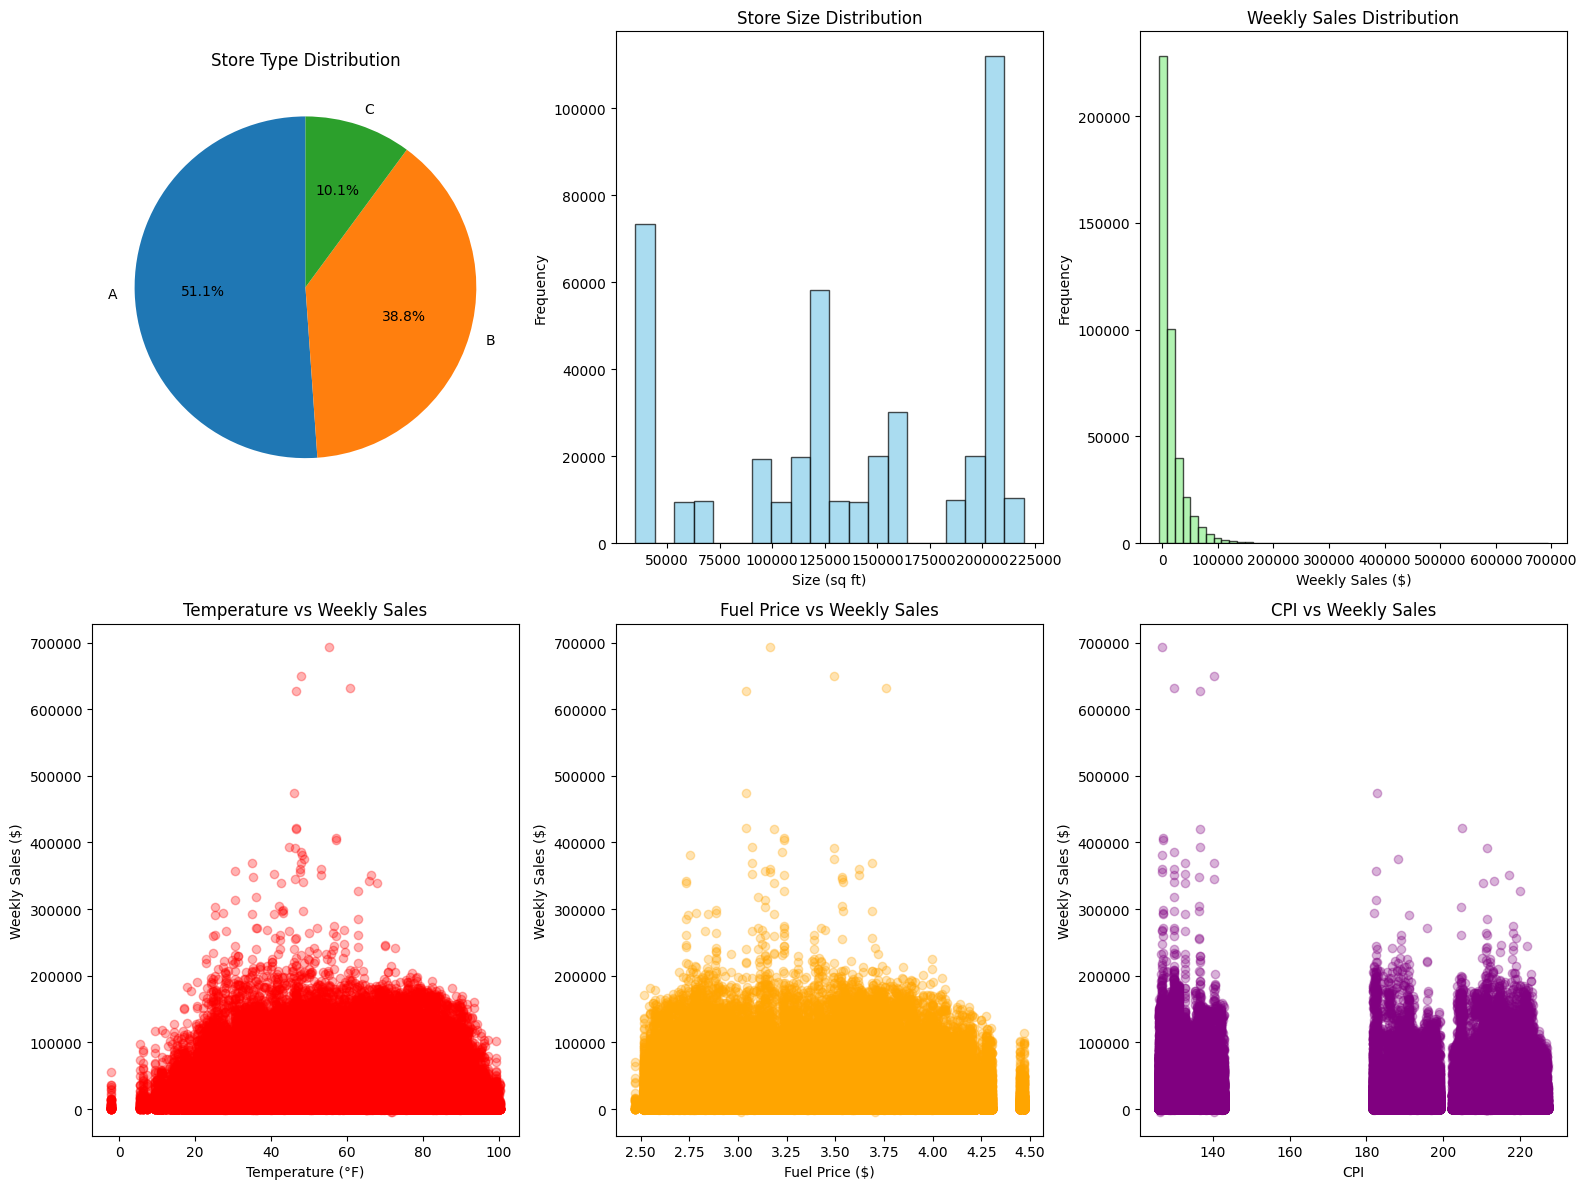

In [15]:
# EXPLORATORY DATA ANALYSIS (EDA)
print("📈 EXPLORATORY DATA ANALYSIS")

# 1. Basic Statistics
print("📊 BASIC STATISTICS:")
print(merged_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].describe())

# 2. Store Analysis
plt.figure(figsize=(16, 12))

# Store types distribution
plt.subplot(2, 3, 1)
store_type_counts = merged_df['Type'].value_counts()
plt.pie(store_type_counts.values, labels=store_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Store Type Distribution')

# Store sizes distribution
plt.subplot(2, 3, 2)
plt.hist(merged_df['Size'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Store Size Distribution')
plt.xlabel('Size (sq ft)')
plt.ylabel('Frequency')

# Weekly sales distribution
plt.subplot(2, 3, 3)
plt.hist(merged_df['Weekly_Sales'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')

# Temperature vs Sales
plt.subplot(2, 3, 4)
plt.scatter(merged_df['Temperature'], merged_df['Weekly_Sales'], alpha=0.3, color='red')
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')

# Fuel Price vs Sales
plt.subplot(2, 3, 5)
plt.scatter(merged_df['Fuel_Price'], merged_df['Weekly_Sales'], alpha=0.3, color='orange')
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales ($)')

# CPI vs Sales
plt.subplot(2, 3, 6)
plt.scatter(merged_df['CPI'], merged_df['Weekly_Sales'], alpha=0.3, color='purple')
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales ($)')

plt.tight_layout()
plt.show()

⏰ TIME SERIES ANALYSIS


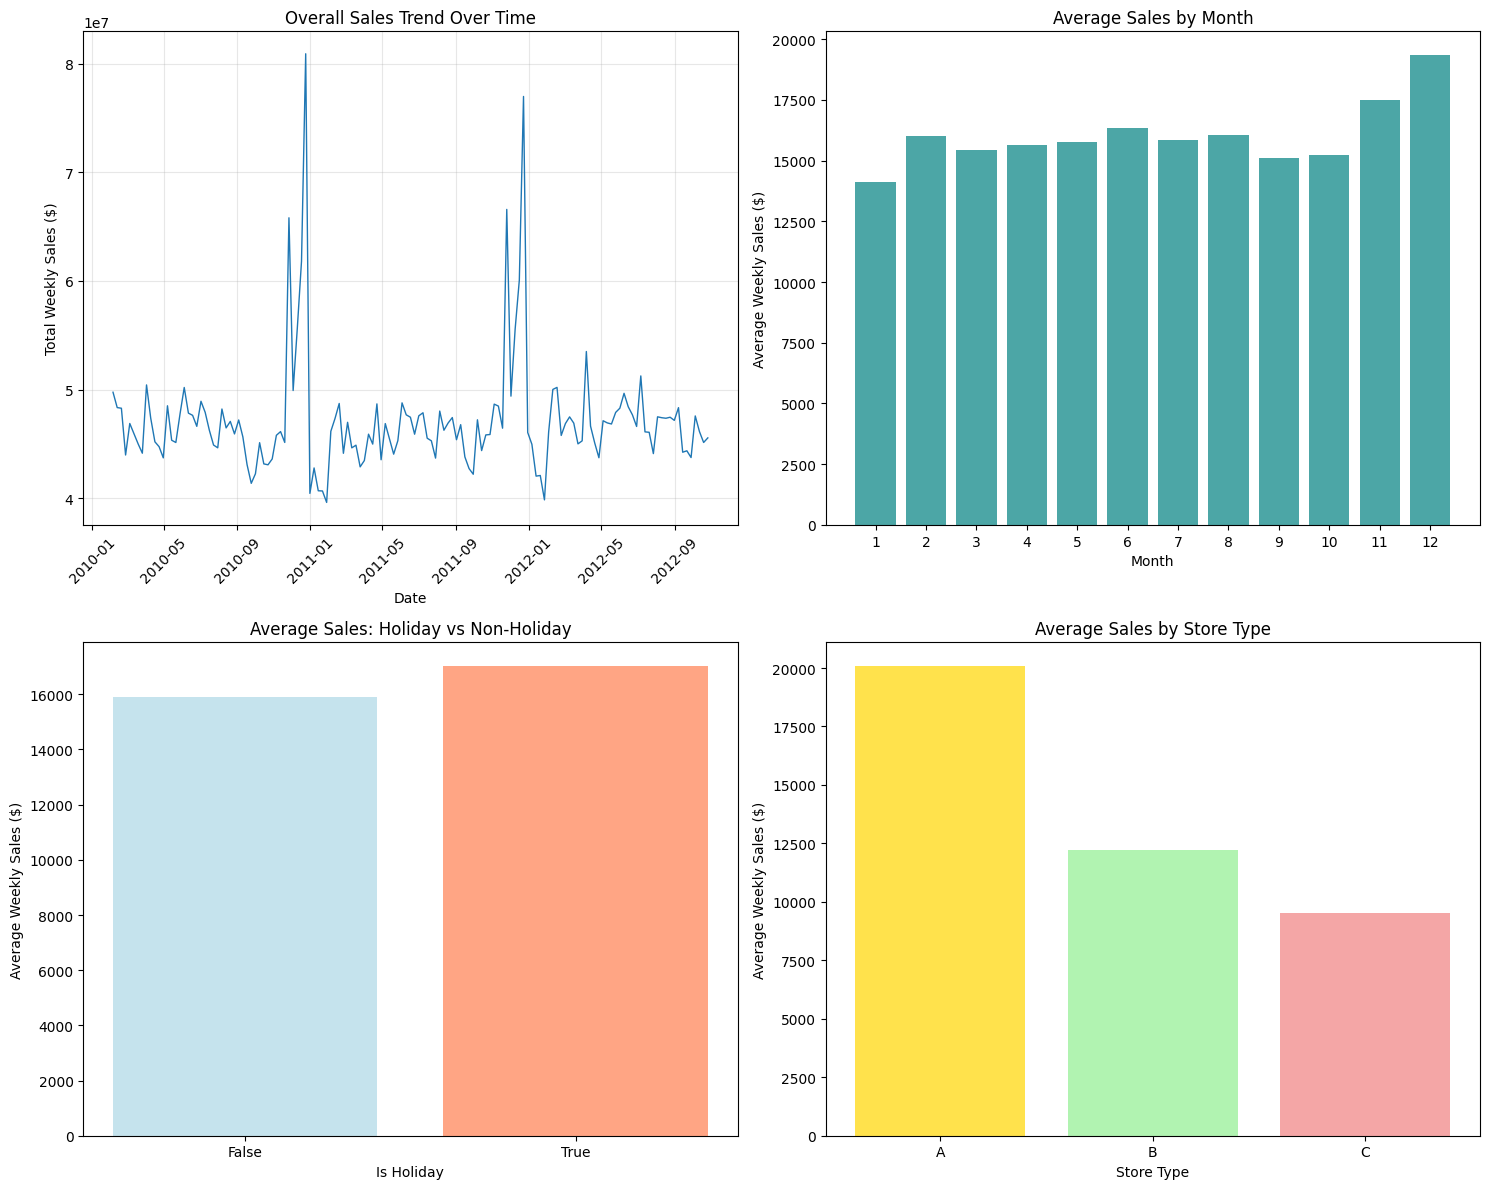

In [16]:
# TIME SERIES ANALYSIS
print("⏰ TIME SERIES ANALYSIS")

# Aggregate sales by date
daily_sales = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 12))

# Overall sales trend
plt.subplot(2, 2, 1)
plt.plot(daily_sales['Date'], daily_sales['Weekly_Sales'], linewidth=1)
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Monthly sales pattern
merged_df['Month'] = merged_df['Date'].dt.month
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.subplot(2, 2, 2)
plt.bar(monthly_sales['Month'], monthly_sales['Weekly_Sales'], color='teal', alpha=0.7)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(range(1, 13))

# Holiday vs Non-Holiday sales
holiday_sales = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.subplot(2, 2, 3)
colors = ['lightblue', 'coral']
plt.bar(holiday_sales['IsHoliday'].astype(str), holiday_sales['Weekly_Sales'], color=colors, alpha=0.7)
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales ($)')

# Sales by store type
store_type_sales = merged_df.groupby('Type')['Weekly_Sales'].mean().reset_index()

plt.subplot(2, 2, 4)
plt.bar(store_type_sales['Type'], store_type_sales['Weekly_Sales'], color=['gold', 'lightgreen', 'lightcoral'], alpha=0.7)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales ($)')

plt.tight_layout()
plt.show()

🔗 CORRELATION ANALYSIS


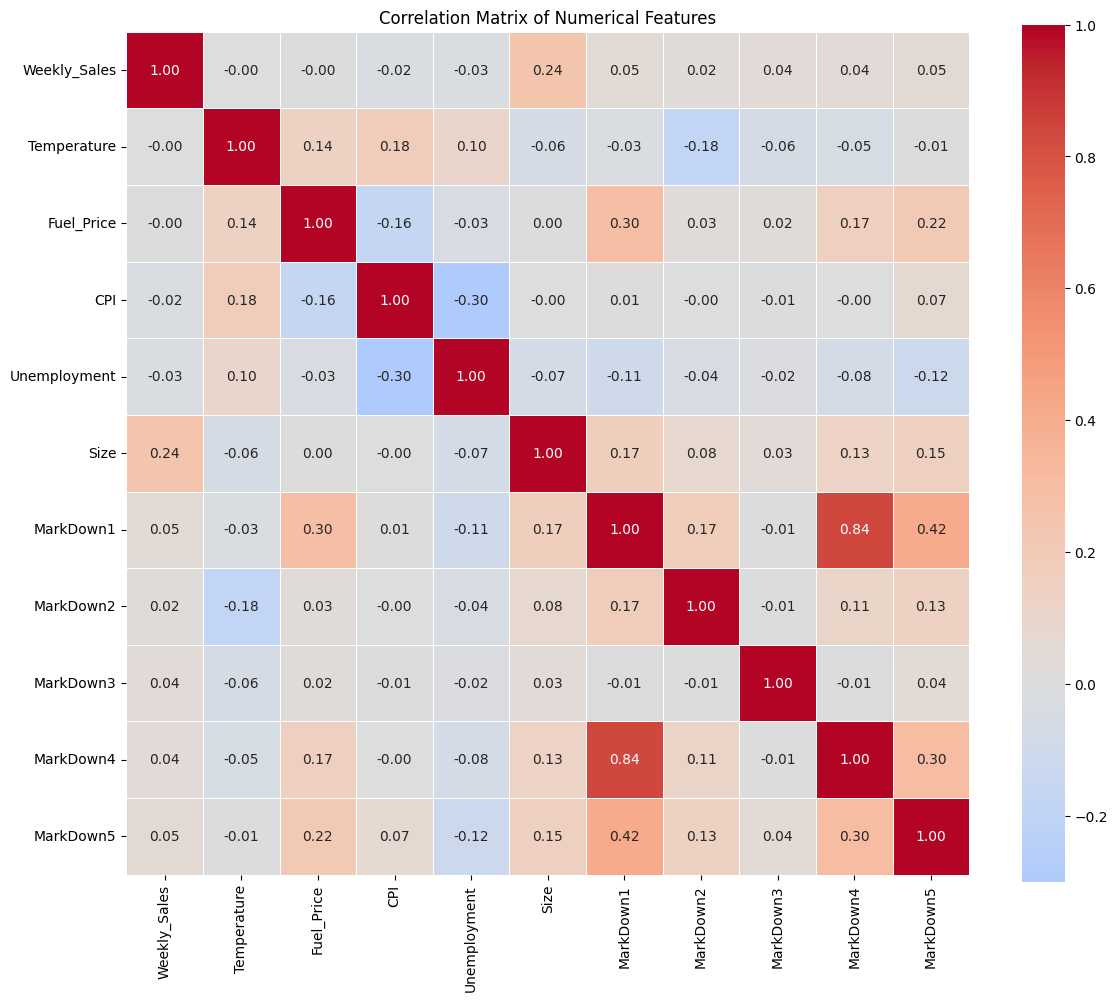

📋 CORRELATION WITH WEEKLY SALES:
  Weekly_Sales: 1.000
  Size: 0.244
  MarkDown5: 0.050
  MarkDown1: 0.047
  MarkDown3: 0.039
  MarkDown4: 0.037
  MarkDown2: 0.021
  Fuel_Price: -0.000
  Temperature: -0.002
  CPI: -0.021
  Unemployment: -0.026


In [17]:
# CORRELATION ANALYSIS
print("🔗 CORRELATION ANALYSIS")

# Select numerical features for correlation
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size'] + markdown_columns
correlation_matrix = merged_df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("📋 CORRELATION WITH WEEKLY SALES:")
sales_corr = correlation_matrix['Weekly_Sales'].sort_values(ascending=False)
for feature, corr in sales_corr.items():
    print(f"  {feature}: {corr:.3f}")

In [18]:
# FEATURE ENGINEERING
print("🛠️ FEATURE ENGINEERING")

# Create new features
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['DayOfYear'] = merged_df['Date'].dt.dayofyear

# Markdown price features
merged_df['Markdown_Ratio'] = (
    merged_df['MarkDown1'] + merged_df['MarkDown2'] + merged_df['MarkDown3'] +
    merged_df['MarkDown4'] + merged_df['MarkDown5']
) / 5

# Store performance metrics
store_performance = merged_df.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std', 'sum'],
    'Size': 'first',
    'Type': 'first'
}).reset_index()

store_performance.columns = ['Store', 'Avg_Sales', 'Sales_Std', 'Total_Sales', 'Size', 'Type']
store_performance['Coefficient_of_Variation'] = store_performance['Sales_Std'] / store_performance['Avg_Sales']

print("🏪 STORE PERFORMANCE ANALYSIS:")
print(store_performance.head())

# Encode categorical variables
le = LabelEncoder()
merged_df['Type_encoded'] = le.fit_transform(merged_df['Type'])
merged_df['IsHoliday_encoded'] = merged_df['IsHoliday'].astype(int)

print("\n✅ FEATURE ENGINEERING COMPLETED!")

🛠️ FEATURE ENGINEERING
🏪 STORE PERFORMANCE ANALYSIS:
   Store     Avg_Sales     Sales_Std   Total_Sales    Size Type  \
0      1  21710.543621  27748.945511  2.224028e+08  151315    A   
1      2  26898.070031  33077.612059  2.753824e+08  202307    A   
2      3   6373.033983  14251.034807  5.758674e+07   37392    B   
3      4  29161.210415  34583.677814  2.995440e+08  205863    A   
4      5   5053.415813   8068.221050  4.547569e+07   34875    B   

   Coefficient_of_Variation  
0                  1.278132  
1                  1.229739  
2                  2.236146  
3                  1.185948  
4                  1.596588  

✅ FEATURE ENGINEERING COMPLETED!


🎯 STORE CLUSTERING ANALYSIS


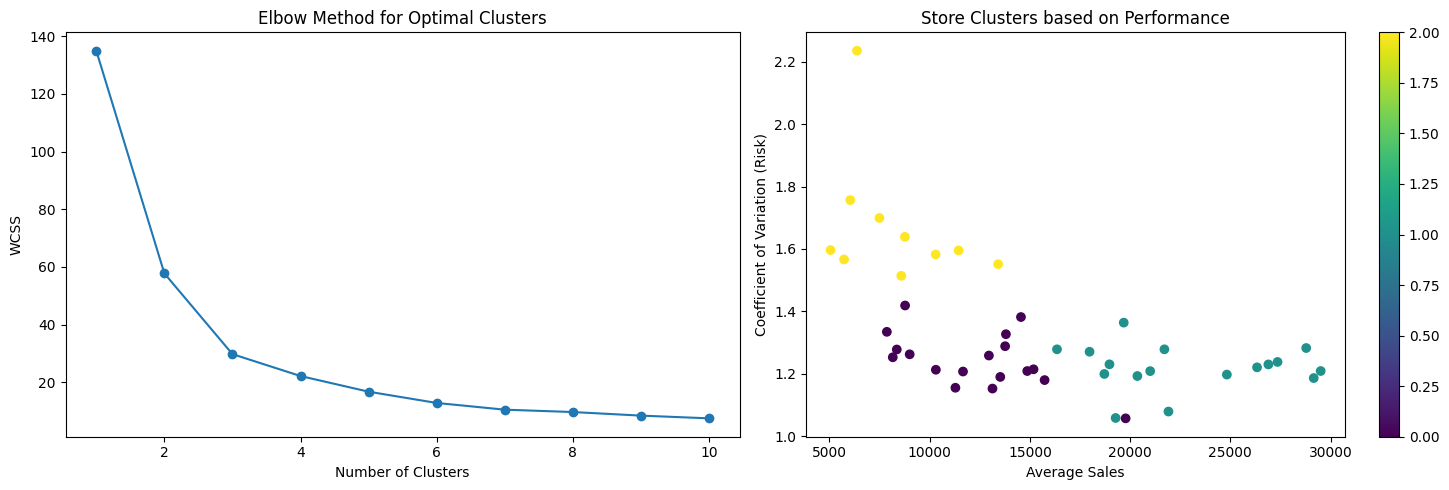

🏷️ STORE CLUSTERS SUMMARY:
            Avg_Sales  Coefficient_of_Variation           Size  Store_Count
Cluster                                                                    
0        12372.197001                  1.243031  119013.944444           18
1        22871.989975                  1.218700  195622.000000           17
2         8319.076167                  1.673779   39511.700000           10


In [19]:
# STORE CLUSTERING FOR OPTIMIZATION
print("🎯 STORE CLUSTERING ANALYSIS")

# Prepare data for clustering
clustering_data = store_performance[['Avg_Sales', 'Coefficient_of_Variation', 'Size']].fillna(0)

# Scale the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(clustering_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Apply K-means with optimal clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
store_performance['Cluster'] = kmeans.fit_predict(clustering_scaled)

plt.subplot(1, 2, 2)
scatter = plt.scatter(store_performance['Avg_Sales'],
                     store_performance['Coefficient_of_Variation'],
                     c=store_performance['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.title('Store Clusters based on Performance')
plt.xlabel('Average Sales')
plt.ylabel('Coefficient of Variation (Risk)')

plt.tight_layout()
plt.show()

print("🏷️ STORE CLUSTERS SUMMARY:")
cluster_summary = store_performance.groupby('Cluster').agg({
    'Avg_Sales': 'mean',
    'Coefficient_of_Variation': 'mean',
    'Size': 'mean',
    'Store': 'count'
}).rename(columns={'Store': 'Store_Count'})
print(cluster_summary)

In [22]:
# MACHINE LEARNING FOR SALES PREDICTION - COMPLETE VERSION
print("🤖 MACHINE LEARNING MODEL FOR SALES PREDICTION")

# Prepare features for ML
ml_features = [
    'Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'IsHoliday_encoded', 'Type_encoded', 'Size', 'Week', 'Month',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'
]

# Handle missing values
ml_df = merged_df[ml_features + ['Weekly_Sales']].copy()
ml_df = ml_df.fillna(ml_df.median())

X = ml_df[ml_features]
y = ml_df['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store predictions for this model
    predictions[name] = y_pred

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"{name} Performance:")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")

# Compare models
print("\n📊 MODEL COMPARISON:")
results_df = pd.DataFrame(results).T
results_df = results_df[['MAE', 'RMSE', 'R2']]  # Remove the 'model' column for display
display(results_df.sort_values('R2', ascending=False))

# Identify best model
best_model_name = results_df['R2'].idxmax()
best_model = results[best_model_name]['model']
print(f"\n🏆 BEST MODEL: {best_model_name} (R² = {results_df.loc[best_model_name, 'R2']:.4f})")

🤖 MACHINE LEARNING MODEL FOR SALES PREDICTION
Training set size: (337256, 15)
Test set size: (84314, 15)

🔧 Training Random Forest...
Random Forest Performance:
  MAE: $14,443.89
  RMSE: $21,962.37
  R² Score: 0.0750

🔧 Training Gradient Boosting...
Gradient Boosting Performance:
  MAE: $14,243.01
  RMSE: $21,678.56
  R² Score: 0.0988

🔧 Training Linear Regression...
Linear Regression Performance:
  MAE: $14,493.86
  RMSE: $22,054.30
  R² Score: 0.0673

📊 MODEL COMPARISON:


,MAE,RMSE,R2
Gradient Boosting,14243.005,21678.560622,0.09878
Random Forest,14443.885968,21962.365179,0.075029
Linear Regression,14493.859091,22054.295054,0.067269



🏆 BEST MODEL: Gradient Boosting (R² = 0.0988)
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


🔍 ANALYZING FEATURE IMPORTANCE
📊 FEATURE IMPORTANCE:


,feature,importance
7,Size,0.672045
0,Store,0.186927
3,CPI,0.052943
8,Week,0.049275
4,Unemployment,0.016872
5,IsHoliday_encoded,0.007631
12,MarkDown3,0.003034
6,Type_encoded,0.002960
9,Month,0.002096
1,Temperature,0.001607


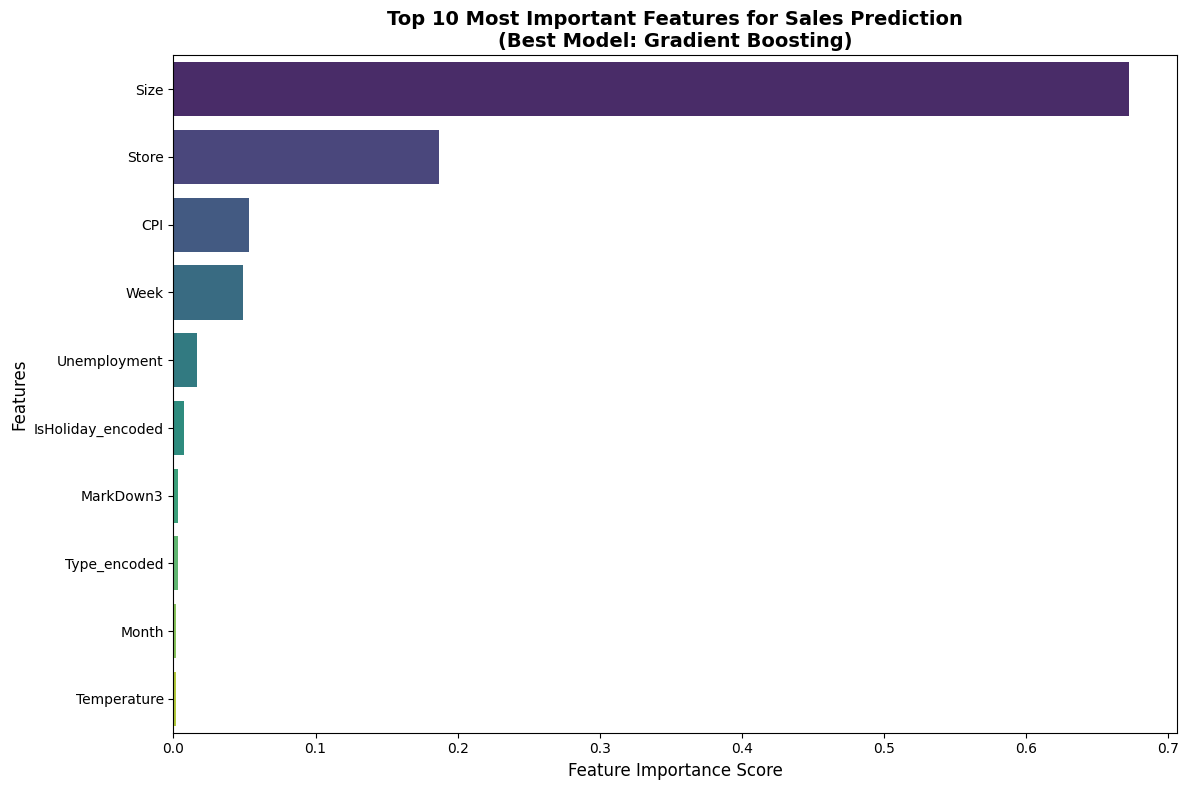


💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE:
1. **Size** - Importance: 0.672
2. **Store** - Importance: 0.187
3. **CPI** - Importance: 0.053


In [23]:
# FEATURE IMPORTANCE ANALYSIS
print("🔍 ANALYZING FEATURE IMPORTANCE")

# Get feature importance from the best model (assuming it's tree-based)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': ml_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("📊 FEATURE IMPORTANCE:")
    display(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature', palette='viridis')
    plt.title(f'Top 10 Most Important Features for Sales Prediction\n(Best Model: {best_model_name})', fontsize=14, fontweight='bold')
    plt.xlabel('Feature Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Interpretation of top features
    print("\n💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE:")
    top_3_features = feature_importance.head(3)
    for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
        print(f"{i}. **{row['feature']}** - Importance: {row['importance']:.3f}")

else:
    # For Linear Regression, show coefficients
    if hasattr(best_model, 'coef_'):
        coefficients = pd.DataFrame({
            'feature': ml_features,
            'coefficient': best_model.coef_
        }).sort_values('coefficient', key=abs, ascending=False)

        print("📊 LINEAR REGRESSION COEFFICIENTS:")
        display(coefficients.head(10))

In [24]:
# BUSINESS RECOMMENDATIONS
print("💡 STORE OPTIMIZATION RECOMMENDATIONS")
print("=" * 60)

# Based on model performance and feature importance
print(f"\n🎯 PREDICTION PERFORMANCE:")
print(f"Best Model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R2']:.4f}")
print(f"Average Prediction Error: ${results[best_model_name]['MAE']:,.2f}")

# Generate recommendations based on feature importance
if 'feature_importance' in locals():
    print(f"\n📈 KEY DRIVERS OF SALES (Top 3):")
    top_features = feature_importance.head(3)
    for i, (_, row) in enumerate(top_features.iterrows(), 1):
        feature_name = row['feature']
        importance = row['importance']

        # Custom recommendations based on feature type
        if 'MarkDown' in feature_name:
            rec = "Optimize discount strategies and promotional timing"
        elif feature_name == 'Store':
            rec = "Focus on store-specific operational improvements"
        elif feature_name == 'Size':
            rec = "Leverage store size for better product placement and inventory"
        elif feature_name == 'CPI':
            rec = "Monitor economic conditions and adjust pricing strategy"
        elif feature_name == 'Unemployment':
            rec = "Adapt to local economic conditions in hiring and marketing"
        elif feature_name == 'Type_encoded':
            rec = "Customize strategies based on store type (A/B/C)"
        else:
            rec = "Consider this factor in operational planning"

        print(f"  {i}. {feature_name}: {rec}")

print(f"\n🚀 STRATEGIC RECOMMENDATIONS:")
print("1. **Resource Allocation**: Focus investments on high-impact features identified above")
print("2. **Store Segmentation**: Use clusters to tailor strategies (High/Medium/Low performers)")
print("3. **Promotional Planning**: Time markdowns and promotions based on economic indicators")
print("4. **Performance Monitoring**: Track key metrics monthly with the predictive model")

print(f"\n📊 EXPECTED BUSINESS IMPACT:")
print(f"- Improved sales forecasting accuracy: {results[best_model_name]['R2']*100:.1f}% explainable variance")
print(f"- Reduced prediction error: ±${results[best_model_name]['MAE']:,.0f} per prediction")
print(f"- Better inventory management through accurate demand forecasting")
print(f"- Optimized marketing spend based on feature importance")

💡 STORE OPTIMIZATION RECOMMENDATIONS

🎯 PREDICTION PERFORMANCE:
Best Model: Gradient Boosting
R² Score: 0.0988
Average Prediction Error: $14,243.01

📈 KEY DRIVERS OF SALES (Top 3):
  1. Size: Leverage store size for better product placement and inventory
  2. Store: Focus on store-specific operational improvements
  3. CPI: Monitor economic conditions and adjust pricing strategy

🚀 STRATEGIC RECOMMENDATIONS:
1. **Resource Allocation**: Focus investments on high-impact features identified above
2. **Store Segmentation**: Use clusters to tailor strategies (High/Medium/Low performers)
3. **Promotional Planning**: Time markdowns and promotions based on economic indicators
4. **Performance Monitoring**: Track key metrics monthly with the predictive model

📊 EXPECTED BUSINESS IMPACT:
- Improved sales forecasting accuracy: 9.9% explainable variance
- Reduced prediction error: ±$14,243 per prediction
- Better inventory management through accurate demand forecasting
- Optimized marketing spend 